# Correlation and Experimental Design

## Basics

- x = explanatory/independent variable
- y = response/dependent variable

Correlation coefficient
- Quantifies the linear relationship between two variables 
- Number between -1 and 1
- Magnitude corresponds to strength of relationship
- Sign (+ or -) corresponds to direction of relationship

## Visualizing relationships

In [1]:
import yfinance as yf
from datetime import datetime

In [2]:
info = yf.Tickers(['BTC-USD','AMD'])

In [3]:
info_history_price = info.history(period="1y")

[*********************100%***********************]  2 of 2 completed


In [4]:
info_history_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2023-01-05 to 2024-01-05
Freq: D
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (Close, AMD)             252 non-null    float64
 1   (Close, BTC-USD)         366 non-null    float64
 2   (Dividends, AMD)         252 non-null    float64
 3   (Dividends, BTC-USD)     366 non-null    float64
 4   (High, AMD)              252 non-null    float64
 5   (High, BTC-USD)          366 non-null    float64
 6   (Low, AMD)               252 non-null    float64
 7   (Low, BTC-USD)           366 non-null    float64
 8   (Open, AMD)              252 non-null    float64
 9   (Open, BTC-USD)          366 non-null    float64
 10  (Stock Splits, AMD)      252 non-null    float64
 11  (Stock Splits, BTC-USD)  366 non-null    float64
 12  (Volume, AMD)            252 non-null    float64
 13  (Volume, BTC-USD)        366 non-null    int64  
dtyp

In [5]:
info_history_price = info_history_price['Close']
info_history_price.head()

,AMD,BTC-USD
Date,,
2023-01-05,62.330002,16836.736328
2023-01-06,63.959999,16951.968750
2023-01-07,NaN,16955.078125
2023-01-08,NaN,17091.144531
2023-01-09,67.239998,17196.554688


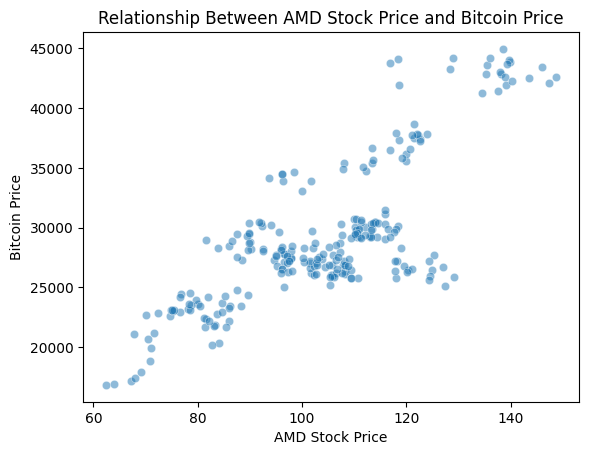

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=info_history_price['AMD'], y=info_history_price['BTC-USD'], alpha=0.5)
plt.xlabel("AMD Stock Price")
plt.ylabel("Bitcoin Price")
plt.title("Relationship Between AMD Stock Price and Bitcoin Price")
plt.show()

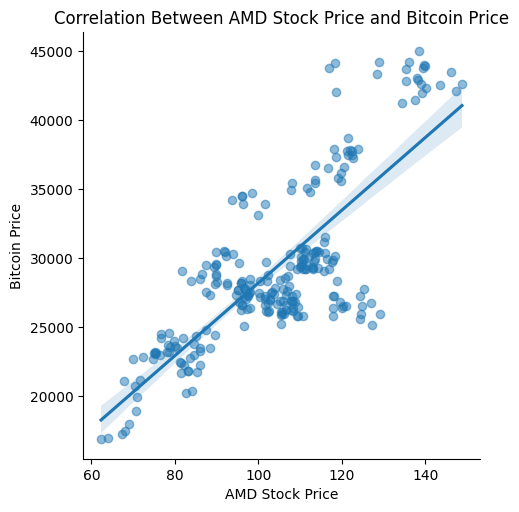

In [15]:
sns.lmplot(x='AMD', y='BTC-USD', data = info_history_price, ci= 95, scatter_kws={'alpha':0.5})
plt.xlabel("AMD Stock Price")
plt.ylabel("Bitcoin Price")
plt.title("Correlation Between AMD Stock Price and Bitcoin Price")
plt.show()

## Computing correlation

[Pearson product-moment correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

$$r = \frac{\sum(x_i - \bar x)(y_i - \bar y)}{\sqrt{\sum(x_i - \bar x)^2 \sum(y_i - \bar y)^2}}$$
$r$ = correlation coefficient

$x_{i}$	=	values of the x-variable in a sample

$\bar{x}$	=	mean of the values of the x-variable

$y_{i}$	=	values of the y-variable in a sample

$\bar{y}$	=	mean of the values of the y-variable

Variations of Pearson correlation coefficient:
- Kendall's tau
- Spearman's rho


In [8]:
info_history_price['AMD'].corr(info_history_price['BTC-USD'])

0.7855421884124678

In [9]:
info_history_price['BTC-USD'].corr(info_history_price['AMD'])

0.7855421884124678

## Correlation caveats

Correlation only accounts for linear relationships

- Always visualize data before use Correlation
- Highly skewed values -> log transformation
    ```python
    df['log_var'] = np.log(df['var'])
    ```
- Correlation does not imply causation ([spurious correlation](https://en.wikipedia.org/wiki/Spurious_relationship))
    - correlation not always implied that one thing causes another. **<ins>Establish association, not causation</ins>**
    - confounding leads to spurious correlation
    - third variable is called a confounder, or lurking variable

## Design of experiments

### Controlled Experiments

Participants are assigned by researchers to either treatment group or control group.

**_Groups should be comparable._**

### Measures to reduce confounding(bias)

- Randomized controlled trial
- Placebo
    - Resembles treatment, but has no effect
- Double-blind trial
    - The treatment patients have is unknown to both patients and doctors until after the study is concluded.

### Observational studies

- Participants are not assigned randomly to groups
    - Participants assign themselves, usually based on pre-existing characteristics
- Reasons:
    - We can't force someone to smoke or have a disease
    - We can't make someone have certain past behaviours
- 

### Longitudinal vs. cross-sectional studies

- Longitudinal study
  
    Participants are followed over a period oftime to examine effect of treatment onresponse

    More expensive, results take longer.

- Cross-sectional study

    Data on participants is collected from single moment in time.

    Cheaper, faster, more convenient.